## Installing and importing the relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix, roc_curve, roc_auc_score
pd.options.display.max_rows = 10

## Loading the data in our working environment

In [2]:
data = pd.read_csv("recipes.csv")

## Exploring Contents of the data

In [3]:
data

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...
43087,22945,Yummy Meatloaf,Meat,281.5,111.3,13.2,11.1,25.3,6.0,1.0
43088,110033,Slow Cooker Shanks,Lamb/Sheep,697.2,242.1,3.8,1.9,72.9,4.0,0.0
43089,240945,Sin-Free Chocolate Chews,Drop Cookies,94.5,0.0,22.7,19.1,2.0,14.0,1.0
43090,164157,Montreal Salsa Chicken,Chicken Breast,207.1,72.6,20.1,12.7,24.9,4.0,1.0


## Checking the counts of contents of the RecipeCategory column

In [4]:
data['RecipeCategory'].value_counts()

Dessert              4211
Lunch/Snacks         3271
One Dish Meal        2895
Vegetable            2497
Breakfast            1969
                     ... 
Black Bean Soup         1
Ethiopian               1
St. Patrick's Day       1
Mushroom Soup           1
Cambodian               1
Name: RecipeCategory, Length: 246, dtype: int64

## Checking for null values

In [5]:
data.isnull().sum()

RecipeId                0
Name                    0
RecipeCategory         40
Calories                0
CholesterolContent      0
CarbohydrateContent     0
SugarContent            0
ProteinContent          0
RecipeServings          0
HighScore               0
dtype: int64

## Dropping Null values to aid our analysis

In [6]:
data = data.dropna(axis=0)

## For any null values 

In [7]:
data.isnull().sum()

RecipeId               0
Name                   0
RecipeCategory         0
Calories               0
CholesterolContent     0
CarbohydrateContent    0
SugarContent           0
ProteinContent         0
RecipeServings         0
HighScore              0
dtype: int64

## Slicing the data to select features that are important for the analysis
This is because the Name and RecipeId have large amounts of categoricals and will be tedious to one hot encode them

In [8]:
data1 = data.iloc[:, 2:]

In [9]:
data1

,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0
...,...,...,...,...,...,...,...,...
43087,Meat,281.5,111.3,13.2,11.1,25.3,6.0,1.0
43088,Lamb/Sheep,697.2,242.1,3.8,1.9,72.9,4.0,0.0
43089,Drop Cookies,94.5,0.0,22.7,19.1,2.0,14.0,1.0
43090,Chicken Breast,207.1,72.6,20.1,12.7,24.9,4.0,1.0


## Final checking of the dataframe that will be used for model development

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43052 entries, 0 to 43091
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecipeCategory       43052 non-null  object 
 1   Calories             43052 non-null  float64
 2   CholesterolContent   43052 non-null  float64
 3   CarbohydrateContent  43052 non-null  float64
 4   SugarContent         43052 non-null  float64
 5   ProteinContent       43052 non-null  float64
 6   RecipeServings       43052 non-null  float64
 7   HighScore            43052 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.0+ MB


## One Hot encoding the categorical column using pandas get dummies

In [11]:
get_dummy_data = pd.get_dummies(data1)

In [12]:
get_dummy_data

,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore,RecipeCategory_< 15 Mins,RecipeCategory_< 30 Mins,RecipeCategory_< 4 Hours,...,RecipeCategory_Welsh,RecipeCategory_White Rice,RecipeCategory_Whitefish,RecipeCategory_Whole Chicken,RecipeCategory_Whole Duck,RecipeCategory_Whole Turkey,RecipeCategory_Wild Game,RecipeCategory_Winter,RecipeCategory_Yam/Sweet Potato,RecipeCategory_Yeast Breads
0,699.8,137.3,46.1,1.4,20.9,6.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,297.1,191.8,11.7,0.7,12.2,8.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,131.9,23.3,10.3,4.4,9.1,6.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,203.0,74.8,1.5,0.6,23.3,4.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,261.6,103.6,20.9,0.2,6.7,15.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43087,281.5,111.3,13.2,11.1,25.3,6.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43088,697.2,242.1,3.8,1.9,72.9,4.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43089,94.5,0.0,22.7,19.1,2.0,14.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43090,207.1,72.6,20.1,12.7,24.9,4.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extacting the values that will be fitted to our model

In [13]:
X = get_dummy_data.drop('HighScore', axis = 1).values
y = get_dummy_data['HighScore'].values

## Plotting our classification labels

C:\Users\Anselem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


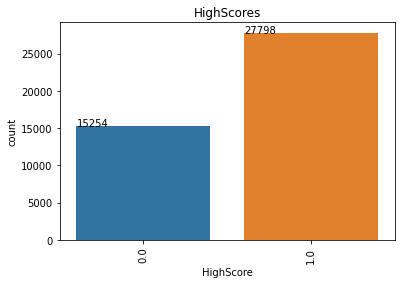

In [14]:
plot = sns.countplot(get_dummy_data['HighScore'])

for p in plot.patches:
    plot.annotate(str(p.get_height()), (p.get_x()*1.0, p.get_height()* 1.0))
plt.xticks(rotation = 90)
plt.title('HighScores')
plt.show()

## Splitting our data for modeling

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling our data

In [16]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting our scaled data on a logistic regression model and checking the accuracy

In [17]:
lg = LogisticRegression(solver="liblinear")
model1 = lg.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
model1.score(X_test, y_test)

0.6467309255603299

## Fitting our data on a RandomForestClassifier model and checking the accuracy

In [18]:
rd = RandomForestClassifier(n_estimators=375, random_state=42)
model2 = rd.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
model2.score(X_test, y_test)

0.6332597839972128

## Balancing our data to even the labels
Due inbalancing of our data we have to use the smote technic to balance the labels

In [19]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)
# summarize the new class distribution
counter1 = Counter(y1)
print(counter1)

Counter({1.0: 27798, 0.0: 27798})


## Splitting our balanced data

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

## Fitting our balanced unscaled data on our logistic regression model and checking the accuracy

In [21]:
lg2 = LogisticRegression(solver="liblinear")
model1 = lg2.fit(X1_train, y1_train)
y_pred1 = lg2.predict(X1_test)
model1.score(X1_test, y1_test)

0.5428057553956834

## Fitting our balanced unscaled data on our Random forest model and checking the accuracy

In [22]:
rdf = RandomForestClassifier(n_estimators=500, random_state=42)
rdf = rdf.fit(X1_train, y1_train)
y_pred4 = rdf.predict(X1_test)
rdf.score(X1_test, y1_test)

0.7074640287769784

## Checking confusion matrix values for our Random forest model model
Since Randomforest classifier out perform logistic regression we decided to explore it metrics further

In [23]:
cm = confusion_matrix(y1_test, y_pred4)
print(cm)

[[3253 2333]
 [ 920 4614]]


## Checking the accuracy of our model using classification_report
As the case study is a  supervised classification problem, we decided to use classification report to check for classification \
metrics such as precision, recall, f1.score. 

In [24]:
target_names = ['class 0', 'class 1']
class_rep = classification_report(y1_test, y_pred4, target_names = target_names)
print(class_rep)

              precision    recall  f1-score   support

     class 0       0.78      0.58      0.67      5586
     class 1       0.66      0.83      0.74      5534

    accuracy                           0.71     11120
   macro avg       0.72      0.71      0.70     11120
weighted avg       0.72      0.71      0.70     11120



## Accuracy of our best random forest regression model

In [25]:
print(accuracy_score(y1_test, y_pred4))

0.7074640287769784


## Plotting the confusion matrix of our best random forest regression model on a visual format

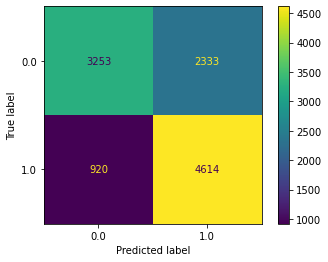

In [26]:
plot_confusion_matrix(rdf, X1_test, y1_test)

## Plotting the ROC_AUC curve

No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.764


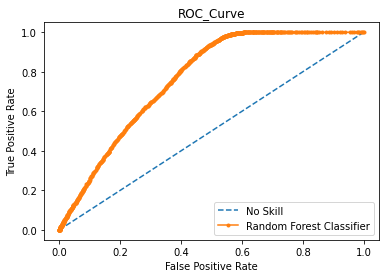

In [27]:
ns_probs = [0 for _ in range(len(X1_test))]
lr_probs = rdf.predict_proba(X1_test)
lr_probs = lr_probs[:,1]
ns_auc = roc_auc_score(y1_test, ns_probs)
lr_auc = roc_auc_score(y1_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y1_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y1_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_Curve')
# show the legend
plt.legend()
# show the plot
plt.show()

## Trying hyperparameter tuning to see if we can improve on the accuracy.

In [28]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}

## Implementing a Grid Search Cross Validation to improve accuracy

In [29]:
rcf = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rcf, param_grid=param_grid, cv= 3, scoring = "accuracy")

## Fitting the Grid Search CV on Random Forest Classifier

In [30]:
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

## Checking the best params for Random Forest with grid search Cross validation

In [31]:
CV_rfc.best_params_

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}

## Checking the best score for on Random Forest with grid search Cross Validation

In [32]:
CV_rfc.best_score_

0.6451322545626815